# Two models to solve
KNN to discover the Customers and the Linear Regression to discover the Sales

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
dflojas = pd.read_csv("lojas.csv")
dftreino = pd.read_csv("dataset_treino.csv")
dfteste = pd.read_csv("dataset_teste.csv")

In [3]:
dftreinamento = pd.merge(dftreino, dflojas, on='Store', how='inner')
dfcompeticao = pd.merge(dfteste, dflojas, on='Store', how='inner')

In [4]:
def strToInt(x):
    if x == 0 or x == '0':
        return 0
    elif x == 'a':
        return 1
    elif x == 'b':
        return 2
    elif x == 'c':
        return 3
    else:
        return 4

dftreinamento['StateHoliday'] = dftreinamento['StateHoliday'].apply(lambda x: strToInt(x))
dftreinamento['StoreType'] = dftreinamento['StoreType'].apply(lambda x: strToInt(x))
dftreinamento['Assortment'] = dftreinamento['Assortment'].apply(lambda x: strToInt(x))

dfcompeticao['StateHoliday'] = dfcompeticao['StateHoliday'].apply(lambda x: strToInt(x))
dfcompeticao['StoreType'] = dfcompeticao['StoreType'].apply(lambda x: strToInt(x))
dfcompeticao['Assortment'] = dfcompeticao['Assortment'].apply(lambda x: strToInt(x))

In [5]:
dftreinamento['Date'] = pd.DatetimeIndex(pd.to_datetime(dftreinamento['Date']), dtype='datetime64[ns]').astype(np.int64)
dfcompeticao['Date'] = pd.DatetimeIndex(pd.to_datetime(dfcompeticao['Date']), dtype='datetime64[ns]').astype(np.int64)

In [6]:
def interval(x):
    if x == 'Feb,May,Aug,Nov':
        return 100
    elif x == 'Jan,Apr,Jul,Oct':
        return 101
    elif x == 'Mar,Jun,Sept,Dec':
        return 102
    else:
        return x

dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].apply(lambda x: interval(x))

dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].apply(lambda x: interval(x))

In [7]:
dftreinamento['Promo2SinceWeek'] = dftreinamento['Promo2SinceWeek'].fillna(dftreinamento['Promo2SinceWeek'].mean())
dftreinamento['Promo2SinceYear'] = dftreinamento['Promo2SinceYear'].fillna(dftreinamento['Promo2SinceYear'].mean())
dftreinamento['PromoInterval'] = dftreinamento['PromoInterval'].fillna(dftreinamento['PromoInterval'].mean())
dftreinamento['CompetitionOpenSinceYear'] = dftreinamento['CompetitionOpenSinceYear'].fillna(dftreinamento['CompetitionOpenSinceYear'].mean())
dftreinamento['CompetitionOpenSinceMonth'] = dftreinamento['CompetitionOpenSinceMonth'].fillna(dftreinamento['CompetitionOpenSinceMonth'].mean())
dftreinamento['CompetitionDistance'] = dftreinamento['CompetitionDistance'].fillna(dftreinamento['CompetitionDistance'].mean())

dfcompeticao['Promo2SinceWeek'] = dfcompeticao['Promo2SinceWeek'].fillna(dfcompeticao['Promo2SinceWeek'].mean())
dfcompeticao['Promo2SinceYear'] = dfcompeticao['Promo2SinceYear'].fillna(dfcompeticao['Promo2SinceYear'].mean())
dfcompeticao['PromoInterval'] = dfcompeticao['PromoInterval'].fillna(dfcompeticao['PromoInterval'].mean())
dfcompeticao['CompetitionOpenSinceYear'] = dfcompeticao['CompetitionOpenSinceYear'].fillna(dfcompeticao['CompetitionOpenSinceYear'].mean())
dfcompeticao['CompetitionOpenSinceMonth'] = dfcompeticao['CompetitionOpenSinceMonth'].fillna(dfcompeticao['CompetitionOpenSinceMonth'].mean())
dfcompeticao['CompetitionDistance'] = dfcompeticao['CompetitionDistance'].fillna(dfcompeticao['CompetitionDistance'].mean())
dfcompeticao['Open'] = dfcompeticao['Open'].fillna(dfcompeticao['Open'].mean())

In [8]:
dftreinamento.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [9]:
X = dftreinamento[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']]

In [10]:
X.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,1438300800000000000,1,1,0,1,3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,100.95849
1,1,4,1438214400000000000,1,1,0,1,3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,100.95849
2,1,3,1438128000000000000,1,1,0,1,3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,100.95849
3,1,2,1438041600000000000,1,1,0,1,3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,100.95849
4,1,1,1437955200000000000,1,1,0,1,3,1,1270.0,9.0,2008.0,0,23.269093,2011.752774,100.95849


In [11]:
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
scaled_features

array([[-1.73164032e+00,  5.01484162e-01,  1.73412321e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       [-1.73164032e+00,  8.30805534e-04,  1.73047962e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       [-1.73164032e+00, -4.99822551e-01,  1.72683602e+00, ...,
         1.78117207e-15,  1.93264674e-13,  0.00000000e+00],
       ...,
       [ 1.72897045e+00,  8.30805534e-04, -1.68721550e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00],
       [ 1.72897045e+00, -4.99822551e-01, -1.69085910e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00],
       [ 1.72897045e+00, -1.00047591e+00, -1.69450270e+00, ...,
        -1.27253271e-01,  2.10138826e-01,  2.26448254e+00]])

In [12]:
df_feat = pd.DataFrame(scaled_features, columns=['Store', 'DayOfWeek', 'Date', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])

In [13]:
df_feat.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,-1.73164,0.501484,1.734123,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-1.001128,1.781172e-15,1.932647e-13,0.0
1,-1.73164,0.000831,1.730480,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-1.001128,1.781172e-15,1.932647e-13,0.0
2,-1.73164,-0.499823,1.726836,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-1.001128,1.781172e-15,1.932647e-13,0.0
3,-1.73164,-1.000476,1.723192,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-1.001128,1.781172e-15,1.932647e-13,0.0
4,-1.73164,-1.501129,1.719549,0.452399,1.273237,-0.159217,2.144211,0.580451,-0.940975,-0.5399,0.669941,-0.139458,-1.001128,1.781172e-15,1.932647e-13,0.0


In [14]:
X = df_feat
y = dftreinamento['Customers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [24]:
knn = KNeighborsClassifier(n_neighbors=2)

In [25]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test)

In [20]:
error_rate = []
for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

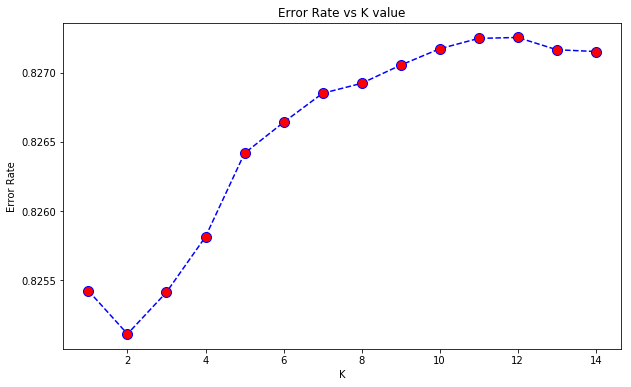

In [23]:
plt.figure(figsize = (10, 6))
plt.plot(range(1,15), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

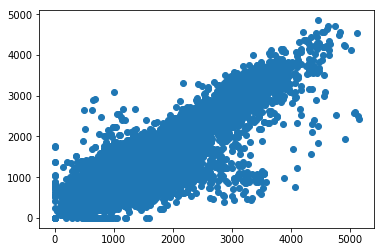

In [28]:
plt.scatter(y_test, pred)

In [30]:
X_test.columns

Index(['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [32]:
XCustomers = dfcompeticao[['Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]

In [33]:
customers_pred = knn.predict(XCustomers)

In [36]:
customers_pred

array([], dtype=int64)

In [37]:
dfcompeticao['Customers'] = customers_pred

In [38]:
dfcompeticao.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Customers
0,1,1,4,1442448000000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,863
1,857,1,3,1442361600000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,863
2,1713,1,2,1442275200000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,863
3,2569,1,1,1442188800000000000,1.0,1,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,863
4,3425,1,7,1442102400000000000,0.0,0,0,0,3,1,1270.0,9.0,2008.0,0,24.426559,2011.820926,100.943662,863


In [40]:
X = dftreinamento[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]
y = dftreinamento['Sales']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [42]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
lmpredicao = lm.predict(X_test)

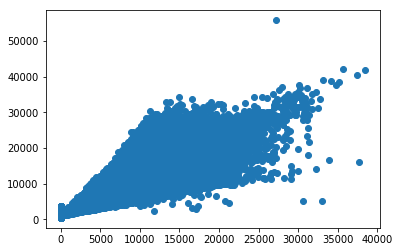

In [44]:
plt.scatter(y_test, lmpredicao)

In [45]:
XComplm = dfcompeticao[['Store', 'DayOfWeek', 'Date', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']]

In [47]:
XComppredicao = lm.predict(XComplm)

In [48]:
XComppredicao

array([7673.88439894, 7673.45174437, 7673.01908981, ..., 7590.04494883,
       7589.60207014, 7589.16911386])

In [49]:
dfPredito = pd.DataFrame(XComppredicao)

In [50]:
dfPredito.index = np.arange(1, len(dfPredito)+1)
dfPredito.count()

0    41088
dtype: int64

In [51]:
dfPredito.to_csv('submissionKNN_LM.csv')